## Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file and creating a dataframe
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


By looking at the dataset and problem statement, I can say that AveragePrice is my target column.
Also, target column data is continuous(float type). So I can conclude that this project is a Regression problem.

## EDA

In [4]:
#Checking shape
df.shape

(18249, 14)

Our dataset has 18249 rows and 14 columns

In [5]:
#Checking missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

I don't see any missing values in this dataset

In [6]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
- Date - The date of the observation
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags      
- Small Bags      
- Large Bags      
- XLarge Bags 
- Unnamed: 0

----------------------------------------------------  
   Output feature:
- AveragePrice - the average price of a single avocado

In [10]:
#Dropping the first column Unnamed: 0 as it shows indexing 
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [15]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume

I can see there are no empty observations in dataset

In [11]:
#Checking duplicates
sum(df.duplicated())

0

There are no duplicates

In [16]:
#Checking data type
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

I notice that Date, type, region are Object - Year is int type - and rest all features are float type values

In [20]:
#Making Dataframe for nominal(categorical) columns
df_nominal = df[[ 'Date','type','region']].copy()
df_nominal.columns

Index(['Date', 'type', 'region'], dtype='object')

### Univariate Analysis

In [17]:
#Checking unique values in each column
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Above is the list of unique count in each column.
type & year has classes.

#### I'll be using countplot for type & year column as it will give frequency of the classes of columns.

<AxesSubplot:xlabel='year', ylabel='count'>

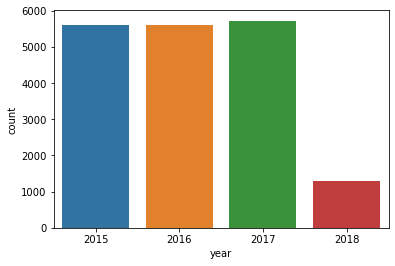

In [25]:
sn.countplot(df['year'])

There was less avocado consumed in 2018 as compared to previous years.

<AxesSubplot:xlabel='type', ylabel='count'>

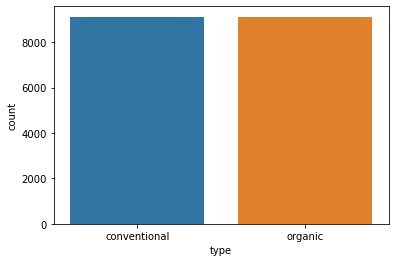

In [23]:
sn.countplot(df['type'])

There are aproximately equal value counts in type column

In [31]:
#Making Dataframe for continuous columns
df_continuous = df[[ 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 
                    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' ]].copy()

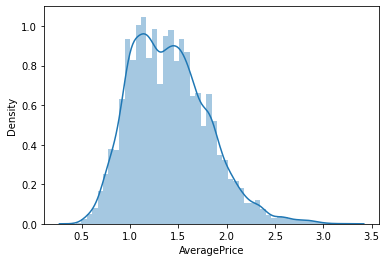

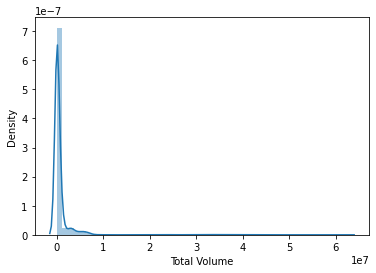

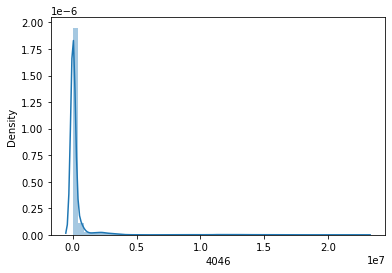

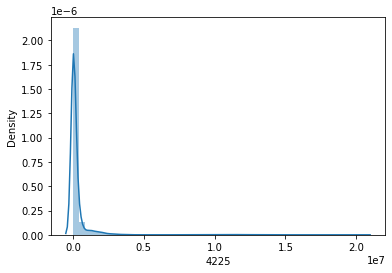

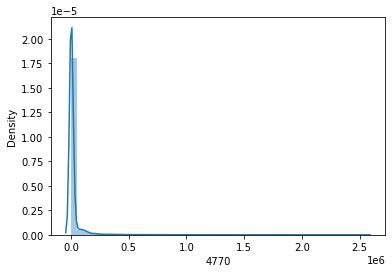

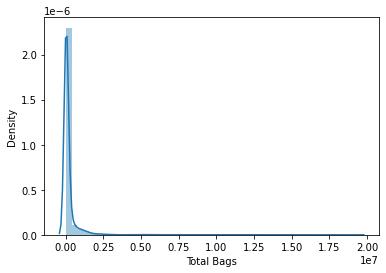

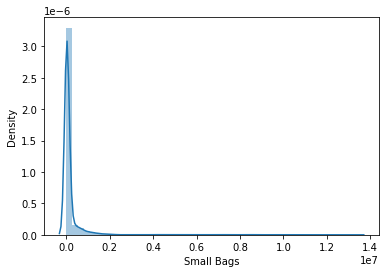

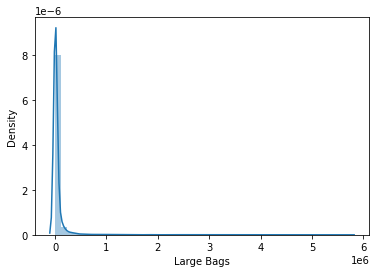

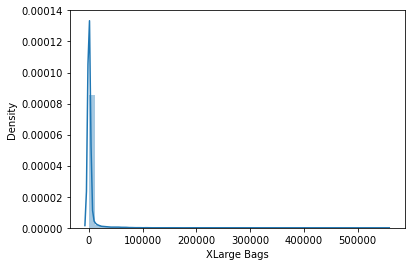

In [30]:
#plotting all the distplots for continuous columns
for i in df_continuous:
    plt.figure()
    sn.distplot(df[i])

I can see that 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are highly skewed.

In [60]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Date','type','region','year']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))   #.astype(str) will embed all values in str type

In [61]:
#checking the columns and its type after encoding
for i in categorical_columns:
    df[i].unique()
    print(df[i])

0        116
1        115
2        113
3        112
4        111
        ... 
18244     70
18245     69
18246     67
18247     66
18248     65
Name: Date, Length: 18249, dtype: int32
0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32
0         0
1         0
2         0
3         0
4         0
         ..
18244    49
18245    49
18246    49
18247    49
18248    49
Name: region, Length: 18249, dtype: int32
0        0
1        0
2        0
3        0
4        0
        ..
18244    3
18245    3
18246    3
18247    3
18248    3
Name: year, Length: 18249, dtype: int32


I've successfully encoded all the categorical columns

## Multi-variate Analysis

In [62]:
#describing the dataset
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,84.004000,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.496301
std,48.787285,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.584822
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


I got all correlations of features with other features. Let me visualize it using heat map.

<AxesSubplot:>

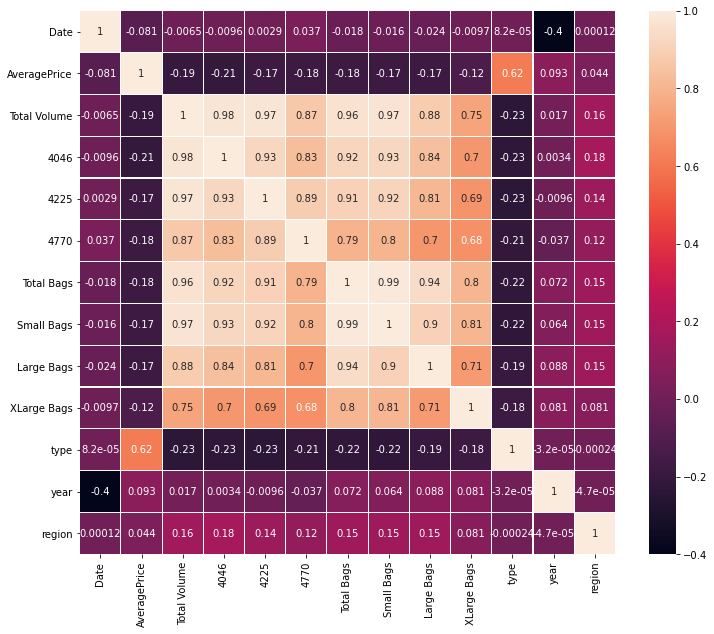

In [63]:
#Plotting heatmap with all features
plt.figure(figsize=(12,10))
sn.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10})

From heatmap, I can observe that:
1. Highly correlated features are: 	type
2. Less correlated: Date, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, year
3. Not related: region

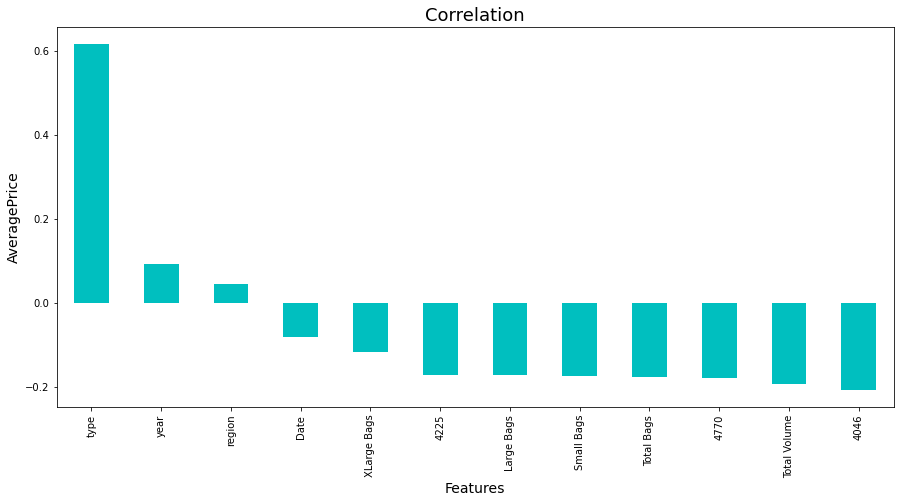

In [64]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(15,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('AveragePrice',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From barplot, I can confirm that:
1. Highly correlated features are: 	type
2. Less correlated: Date, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, year
3. Not related: region

Also, I notice that Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags are negatively correlated.

Hence, I can drop features without any relationship if needed.

## Identifying the outliers

Date               AxesSubplot(0.125,0.749828;0.227941x0.130172)
AveragePrice    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4046               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4225            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Total Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Small Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.672059,0.437414;0.227941x0.130172)
XLarge Bags        AxesSubplot(0.125,0.281207;0.227941x0.130172)
type            AxesSubplot(0.398529,0.281207;0.227941x0.130172)
year            AxesSubplot(0.672059,0.281207;0.227941x0.130172)
region                AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

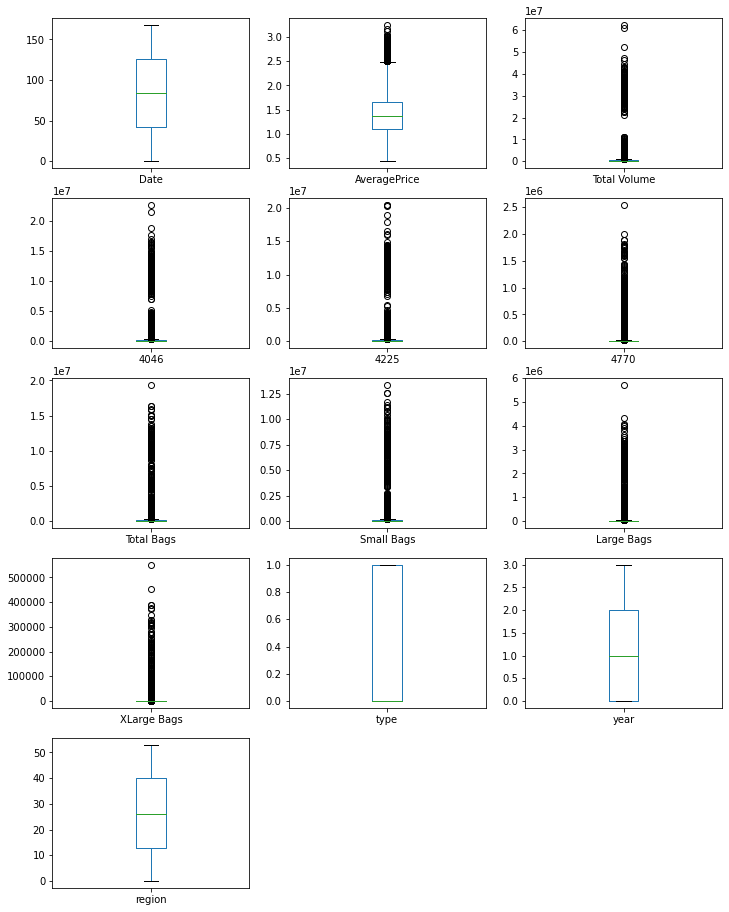

In [65]:
#checking for outliers using box plot
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,16))

<AxesSubplot:>

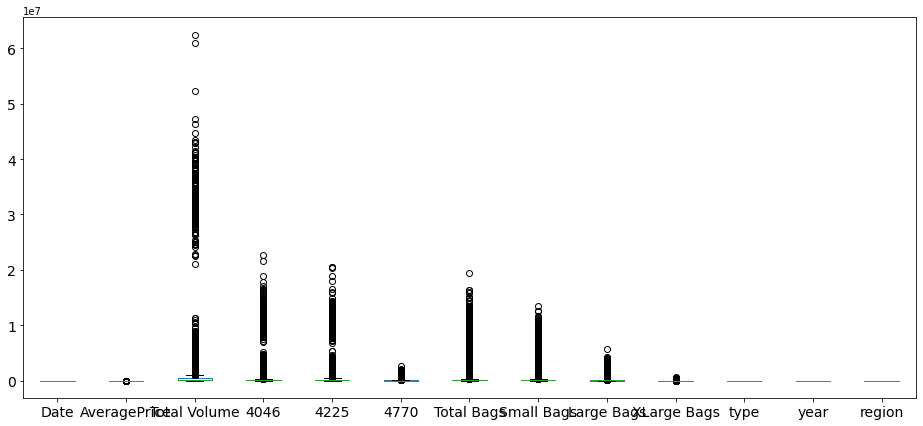

In [66]:
df.plot(kind='box',fontsize=14,figsize=(16,7))

I can see outliers in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags 

## Data cleaning

### Removing outliers

In [135]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df[[ 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [136]:
#Using zscore to remove the outliers
from scipy.stats import zscore
ZS = np.abs(zscore(df))
df1 = df[(ZS<3).all(axis=1)]
df1.shape

(17651, 10)

In [137]:
df.shape

(18249, 10)

I've succefully removed the outliers using zscore. 
Rows in my new dataset are 17782 whereas previously we had 18249 rows.

In [138]:
#Checking the data loss
((18249-17651)/18249)*100

3.276891884486821

So I get data loss of just 2.55% hence I'll proceed with zscore.

### Checking skewness

In [139]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
dtype: float64

I can still see skewness in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags

### Removing skewness using yeo-johnson method

In [140]:
#Creating list of column with skewness
#skewCols=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
skewCols = df.columns.drop('AveragePrice')
skewCols

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [141]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')
df1[skewCols] = PT.fit_transform(df1[skewCols].values)
df1.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
dtype: float64

I can see skewness has been removed. Let me confirm it with distplot

<AxesSubplot:>

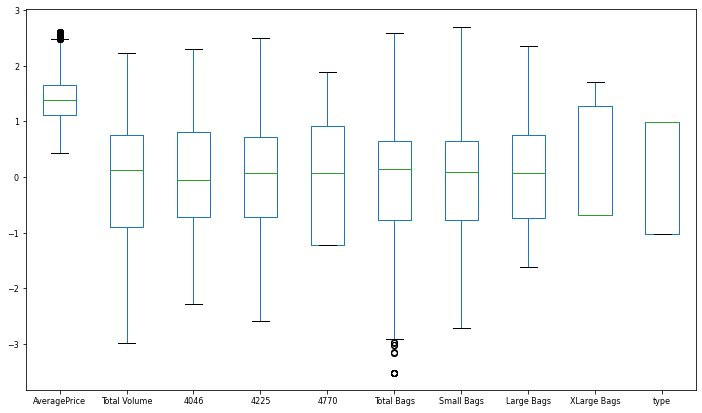

In [142]:
df1.plot(kind='box',fontsize=8,figsize=(12,7))

In [143]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047
1,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047
2,0.93,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047
3,1.08,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047
4,1.28,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047


I can confirm that the skewness has been removed.

## Preprocessing

In [144]:
X = df1.drop("AveragePrice", axis=1)
y = df1["AveragePrice"]

In [145]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047


### SCALING

In [146]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score           #using r2_score as this is cont. data
from sklearn.model_selection import train_test_split

In [147]:
mms=MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,0.558933,0.354981,0.577572,0.322762,0.487692,0.436620,0.212073,0.0,0.0
1,0.545104,0.328863,0.561453,0.337945,0.494141,0.443280,0.214576,0.0,0.0
2,0.612752,0.338765,0.636189,0.401812,0.482965,0.431634,0.217764,0.0,0.0
3,0.577132,0.360395,0.600666,0.355282,0.458939,0.406446,0.232701,0.0,0.0
4,0.538747,0.349074,0.560000,0.358705,0.463321,0.410220,0.255861,0.0,0.0
...,...,...,...,...,...,...,...,...,...
17646,0.443414,0.397585,0.326212,0.000000,0.519970,0.468289,0.304803,0.0,1.0
17647,0.425573,0.363574,0.376472,0.000000,0.492277,0.439470,0.286549,0.0,1.0
17648,0.424817,0.363585,0.355163,0.537080,0.493284,0.442831,0.169426,0.0,1.0
17649,0.438895,0.379060,0.367465,0.536980,0.504615,0.454517,0.178146,0.0,1.0


I've succesfully scaled the dataset using minmaxscaler

### FIND BEST random_state 

In [148]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.5174125800826379  on Random_state  28


Got best accuracy and random state.

In [149]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=maxRS)

I've created the train and test data where test data is 30% of my total data.

## FINDING BEST ALGORITHM

In [150]:
#importing the models and required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Linear Regression

In [151]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(lr,X,y,cv=5).mean()*100)

R2_score: 51.74125800826379
Cross validation score:  2.541138416816313


#### DecisionTreeRegressor

In [152]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(DTR,X,y,cv=5).mean()*100)

R2_score: 54.14742423102983
Cross validation score:  -56.85568187564394


#### RandomForestRegressor

In [153]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(RFR,X,y,cv=5).mean()*100)

R2_score: 77.51270412028416
Cross validation score:  11.633918270564864


#### SupportVectorRegressor

In [154]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(svr,X,y,cv=5).mean()*100)

R2_score: 62.77212397866894
Cross validation score:  18.775649294010215


#### K-Neighbor Regressor

In [155]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(knnr,X,y,cv=5).mean()*100)

R2_score: 75.26545300463722
Cross validation score:  -2.5285295167423305


In [156]:
rg = Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred = rg.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(rg,X,y,cv=5).mean()*100)

R2_score: 51.741251663383615
Cross validation score:  2.5411245402318916
